# <center>        **Introduction to Data Science (S2-22_DSECLZG532)-ASSIGNMENT**</center>

## Group No 38

## Group Member Names:
1. Ayush Gupta - 2023da04441 - 100%
2. Harsh Gupta - 2023da04555 - 100%

# 1. Business Understanding

Students are expected to identify an analytical problem of your choice. You have to detail the Business Understanding part of your problem under this heading which basically addresses the following questions.

   1. What is the business problem that you are trying to solve?
   2. What data do you need to answer the above problem?
   3. What are the different sources of data?
   4. What kind of analytics task are you performing?

Score: 1 Mark in total (0.25 mark each)

--------------Type the answers below this line-------------- 

**Business Understanding**

 **What is the business problem that you are trying to solve?**
   
   Senior secondary school students from rural areas, inspite of having good learning capabilities fail to crack top competetive exams. Rural students clearing competitve exams and getting into premier institutes or government services is essential for the development of the country. A focussed coaching based on the student's competence and social background can help them succeed in competitive exams. 
   
 **What data do you need to answer the above problem?**
   
   We need to get the data of rural student's Math and english comprehensive scores. Also we need a list of social elements of these students that can influence then in their competence
   
 **What are the different sources of data?**  
   The math and english score can be obtained from the education department. Social parameters of those students must be gathered through organization which work in rural areas. 
   For the specific problem we can get a sample of above data from different schools to formulate a coaching plan. 
   
 **What kind of analytics task are you performing?**
   All the students come from rural areas can have varied social background. We need to find cluster of students based on the social and competency parameters to focus specific training for each group of student. We will use **Partitioning Clustering** algorithms to solve this problem.
   Before proceeding to Machine Learning models we will prepare the data by cleaning it from noise, then perform Data wrangling. Once we have good data we will do EDA to visuvalize each feature, their spread and relationship of these features.
   Finally wee will find a suitable ML algorithm and implement. 

# 2. Data Acquisition

For the problem identified , find an appropriate data set (Your data set must
be unique with minimum **20 features and 10k rows**) from any public data source.

---



## 2.1 Download the data directly



In [96]:
##---------Type the code below this line------------------##
import pandas as pd
import requests

# Set the URL of the Excel file on GitHub
url = 'https://github.com/vinothngit/datascience/raw/main/SecondaryEduCompetence.xlsx'

# Make a GET request to download the file
response = requests.get(url)

# Create a bytes object from the response content
file_bytes = response.content

KeyboardInterrupt: 

## 2.2 Code for converting the above downloaded data into a dataframe

In [2]:
##---------Type the code below this line------------------##
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import metrics
from sklearn.metrics import *
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.under_sampling import NeighbourhoodCleaningRule
from imblearn.under_sampling import(InstanceHardnessThreshold)
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.combine import SMOTETomek
from imblearn.combine import SMOTEENN
from imblearn.pipeline import make_pipeline
from collections import Counter
import pylab
pylab.rcParams['figure.figsize'] = (8, 5)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import PrecisionRecallDisplay
import warnings
warnings.filterwarnings("ignore")
from scipy import stats

data =pd.read_csv('/home/e144871/input/SecondaryEduCompetence.csv')

## 2.3 Confirm the data has been correctly by displaying the first 5 and last 5 records.

In [3]:
##---------first 5 records------------------##
data.head()
##---------last 5 records------------------##
data.tail()

,Identifier,Gender,Ethinicity,Parent Education,lunch,Coaching,Numerical,Vocabulary,Comprehension,internet,freetime,goout,health,absences,Mjob,Fjob,reason,guardian,traveltime,studytime
10014,11015,male,group D,high school,standard,none,73,75,78,no,3,3,5,26,teacher,other,home,other,4,3
10015,11016,male,group C,bachelor's degree,standard,none,79,87,77,yes,2,1,5,14,teacher,other,home,father,1,4
10016,11017,female,group C,bachelor's degree,free/reduced,yes,73,86,78,yes,2,2,2,13,teacher,services,other,mother,3,1
10017,11018,female,group A,bachelor's degree,standard,yes,87,89,78,no,5,4,1,31,teacher,at_home,home,father,4,1
10018,11019,male,group A,master's degree,free/reduced,yes,80,79,83,no,4,3,2,73,at_home,other,reputation,other,2,4


## 2.4 Display the column headings, statistical information, description and statistical summary of the data.

In [4]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10019 entries, 0 to 10018
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Identifier        10019 non-null  int64 
 1   Gender            10019 non-null  object
 2   Ethinicity        10017 non-null  object
 3   Parent Education  10019 non-null  object
 4   lunch             10019 non-null  object
 5   Coaching          10019 non-null  object
 6   Numerical         10019 non-null  int64 
 7   Vocabulary        10019 non-null  int64 
 8   Comprehension     10019 non-null  int64 
 9   internet          10019 non-null  object
 10  freetime          10019 non-null  int64 
 11  goout             10019 non-null  int64 
 12  health            10019 non-null  int64 
 13  absences          10019 non-null  int64 
 14  Mjob              10019 non-null  object
 15  Fjob              10019 non-null  object
 16  reason            10019 non-null  object
 17  guardian    

,Identifier,Numerical,Vocabulary,Comprehension,freetime,goout,health,absences,traveltime,studytime
count,10019.000000,10019.000000,10019.000000,10019.000000,10019.000000,10019.000000,10019.000000,10019.000000,10019.000000,10019.000000
mean,6010.000000,71.983631,77.429185,64.684000,3.007286,2.995209,3.019862,36.176465,2.469608,2.486076
std,2892.380507,15.046018,12.847946,17.096398,1.398045,1.403649,1.419886,22.435498,1.121911,1.108814
min,1001.000000,0.000000,17.000000,10.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
25%,3505.500000,62.000000,71.000000,52.000000,2.000000,2.000000,2.000000,16.000000,1.000000,2.000000
50%,6010.000000,74.000000,79.000000,65.000000,3.000000,3.000000,3.000000,36.000000,2.000000,2.000000
75%,8514.500000,83.000000,86.000000,78.000000,4.000000,4.000000,4.000000,56.000000,3.000000,3.000000
max,11019.000000,100.000000,100.000000,100.000000,5.000000,5.000000,5.000000,75.000000,4.000000,4.000000


In [5]:
##---------Type the code below this line------------------##
print(f"\nShape of the data set - {data.shape}") ## size of the dataset

cols = data.columns # All columns of the dataframe

num_cols = data._get_numeric_data().columns 

print(f"\nNumerical Columns - {num_cols}")

print(f"\nCategorical Columns - {list(set(cols) - set(num_cols))}")

print(f"\nALL the Columns \n - {data.columns}") # All columns of the data frame

print(f"\nSTATS OF ALL NUMBERICAL COLUMNS \n\n{data.describe()}") ##Statistical Information of the numerical columns


Shape of the data set - (10019, 20)

Numerical Columns - Index(['Identifier', 'Numerical', 'Vocabulary', 'Comprehension', 'freetime',
       'goout', 'health', 'absences', 'traveltime', 'studytime'],
      dtype='object')

Categorical Columns - ['Fjob', 'Parent Education', 'internet', 'Coaching', 'Ethinicity', 'Mjob', 'guardian', 'reason', 'Gender', 'lunch']

ALL the Columns 
 - Index(['Identifier', 'Gender', 'Ethinicity', 'Parent Education', 'lunch',
       'Coaching', 'Numerical', 'Vocabulary', 'Comprehension', 'internet',
       'freetime', 'goout', 'health', 'absences', 'Mjob', 'Fjob', 'reason',
       'guardian', 'traveltime', 'studytime'],
      dtype='object')

STATS OF ALL NUMBERICAL COLUMNS 

         Identifier     Numerical    Vocabulary  Comprehension      freetime  \
count  10019.000000  10019.000000  10019.000000   10019.000000  10019.000000   
mean    6010.000000     71.983631     77.429185      64.684000      3.007286   
std     2892.380507     15.046018     12.847946 

## 2.5 Write your observations from the above.
1. Size of the dataset
2. What type of data attributes are there?
3. Is there any null data that has to be cleaned?

Score: 2 Marks in total (0.25 marks for 2.1, 0.25 marks for 2.2, 0.5 marks for 2.3, 0.25 marks for 2.4, 0.75 marks for 2.5)

--------------Type the answers below this line--------------

1. Size of the dataset 
 10019 records

2. What type of data attributes are there? - 
 **Categorical** (Disrete) : Identifier, Gender, Ethinicity, Lunch, Coaching, Parent Education
 **Numerical** : Vocabulary, Comprehension, Numberical competency scores

3 Is there any null data that has to be cleaned? 
**Yes**. There are NULL data in the data set which must be cleaned 

Description of features
===================
1) Identifier : Unique ID represeenting a single student

2) Gender : Specifies gender of the student (male or female)

3) Ethinicity : Specifies ethinic background of the student (group A,group B,group C. etc)

4) Parent Education : Specifies highest educational qualification of the parent of each student

5) lunch : The amount of lunch consumption or availability for a student as perr social record (standard or reduced)

6) Coaching : Availability and Accesibilityy to Coaching for that student 

7) Numerical : Score denoting the Mathematical competency of a student (Out ot 100)

8) Vocabulary : Score denoting the Reading competency of a student (Out ot 100)

9) Comprehension : Score denoting the Writing  competency of a student (Out ot 100)

10) internet : Accessibilty of internet (Yes or No) 

11) Freetime : Leisure Time during the day for student (in hours)

12) Goout : Duration in hours student spends outside

13) health : health index, refers to fitness of the student (Out of 5)

14) absences : when student is not present on school

15) Mjob : Mother's profession/job

16) Fjob : Father's profession/job

17) reason : Coaching where they took the teaching 

18) Guardian : who is taking care of the child (Mother or Father)

19) traveltime : time taken for a child to travel from school to home & vice versa 

20) studytime : duration for which student study

# 3. Data Preparation

## 3.1 Check for

* duplicate data
* missing data
* data inconsistencies


In [6]:
duplicate = data[data.duplicated()]
 
print("Total Duplicate Rows :")
print(duplicate)

print("\nNull values in each column :")
print(data.isnull().sum()) ## Number of Null values in each column

## Print only unique columns - eeventually check ffor any duplicate columns
print("\nUnique columns :")
data.columns.unique()

Total Duplicate Rows :
Empty DataFrame
Columns: [Identifier, Gender, Ethinicity, Parent Education, lunch, Coaching, Numerical, Vocabulary, Comprehension, internet, freetime, goout, health, absences, Mjob, Fjob, reason, guardian, traveltime, studytime]
Index: []

Null values in each column :
Identifier          0
Gender              0
Ethinicity          2
Parent Education    0
lunch               0
Coaching            0
Numerical           0
Vocabulary          0
Comprehension       0
internet            0
freetime            0
goout               0
health              0
absences            0
Mjob                0
Fjob                0
reason              0
guardian            0
traveltime          0
studytime           0
dtype: int64

Unique columns :


Index(['Identifier', 'Gender', 'Ethinicity', 'Parent Education', 'lunch',
       'Coaching', 'Numerical', 'Vocabulary', 'Comprehension', 'internet',
       'freetime', 'goout', 'health', 'absences', 'Mjob', 'Fjob', 'reason',
       'guardian', 'traveltime', 'studytime'],
      dtype='object')

## 3.2 Apply techiniques
* to remove duplicate data
* to impute or remove missing data
* to remove data inconsistencies


In [7]:
##---------Type the code below this line------------------##
## Duplicate Rows 
# There are no duplicate rows as each row belong to a unique student. The data does not have any typo erros 

# removing the rows with NULL values. The missing values are specific to a particular studennt
# Also the missing fields are less than 1% off total rows. So we can safeely remove then from dataset

data = data.dropna()
print("\n DataFrame after removing null values...\n",data)
print("\n (Updated) Number of rows and column in our DataFrame = ",data.shape)


datacopy = data.copy()
# Preparing specifc data for computation 
# Preapre total percentage and Grades off students 


 DataFrame after removing null values...
        Identifier  Gender Ethinicity    Parent Education         lunch  \
0            1001  female    group B   bachelor's degree      standard   
1            1002  female    group C        some college      standard   
2            1003  female    group B     master's degree      standard   
3            1004    male    group A  associate's degree  free/reduced   
4            1005    male    group C        some college      standard   
...           ...     ...        ...                 ...           ...   
10014       11015    male    group D         high school      standard   
10015       11016    male    group C   bachelor's degree      standard   
10016       11017  female    group C   bachelor's degree  free/reduced   
10017       11018  female    group A   bachelor's degree      standard   
10018       11019    male    group A     master's degree  free/reduced   

      Coaching  Numerical  Vocabulary  Comprehension internet  freet

In [8]:
#Let us check for unique values for each feature. Replace or correct any feature value
data['Parent Education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [9]:
data['Parent Education']=data['Parent Education'].replace(['some high school'],'high school')
data['Parent Education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school'], dtype=object)

In [10]:
data['lunch']=data['lunch'].replace(['free/reduced'],'reduced')
data['lunch'].unique()

array(['standard', 'reduced'], dtype=object)

In [11]:
data['Ethinicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [12]:
data['Coaching'].unique()

array(['none', 'Yes', 'yes'], dtype=object)

In [13]:
data.head()

,Identifier,Gender,Ethinicity,Parent Education,lunch,Coaching,Numerical,Vocabulary,Comprehension,internet,freetime,goout,health,absences,Mjob,Fjob,reason,guardian,traveltime,studytime
0,1001,female,group B,bachelor's degree,standard,none,72,72,74,no,3,4,3,6,at_home,teacher,course,mother,2,2
1,1002,female,group C,some college,standard,Yes,69,90,88,yes,3,3,3,4,at_home,other,course,father,1,2
2,1003,female,group B,master's degree,standard,none,90,95,93,yes,3,2,3,10,at_home,other,other,mother,1,2
3,1004,male,group A,associate's degree,reduced,none,47,57,44,yes,2,2,5,2,health,services,home,mother,1,3
4,1005,male,group C,some college,standard,none,76,78,75,no,3,2,5,4,other,other,home,father,1,2


## 3.3 Encode categorical data

- **One hot encoding**
- Many features have binary values so instead of using One hot encoding and increasing number of columns, 
- let us **replace those values with numbers**
- One hot encoding increases the number of features. 
- For Gender, Coaching, Lunch can have binary value instead of multiple columns

In [14]:
# Encode categorical data

newdata = data.copy()
numeric_var = {'Gender': {'male':0, 'female':1}}
newdata = newdata.replace(numeric_var)
numeric_var = {'Coaching': {'none':0, 'Yes':1}}
newdata = newdata.replace(numeric_var)
numeric_var = {'lunch': {'reduced':0, 'standard':1}}
newdata = newdata.replace(numeric_var)
numeric_var = {'internet': {'yes':1, 'no':0}}
newdata = newdata.replace(numeric_var)

newdata.head()

,Identifier,Gender,Ethinicity,Parent Education,lunch,Coaching,Numerical,Vocabulary,Comprehension,internet,freetime,goout,health,absences,Mjob,Fjob,reason,guardian,traveltime,studytime
0,1001,1,group B,bachelor's degree,1,0,72,72,74,0,3,4,3,6,at_home,teacher,course,mother,2,2
1,1002,1,group C,some college,1,1,69,90,88,1,3,3,3,4,at_home,other,course,father,1,2
2,1003,1,group B,master's degree,1,0,90,95,93,1,3,2,3,10,at_home,other,other,mother,1,2
3,1004,0,group A,associate's degree,0,0,47,57,44,1,2,2,5,2,health,services,home,mother,1,3
4,1005,0,group C,some college,1,0,76,78,75,0,3,2,5,4,other,other,home,father,1,2


In [15]:
one_hot_encoded_data = pd.get_dummies(newdata, columns = ['Ethinicity', 'Parent Education'])
one_hot_encoded_data.head()
print(one_hot_encoded_data.shape)

(10017, 28)


# **Encoded Data**

In [16]:
##---------Type the code below this line------------------##
one_hot_encoded_data.head()

,Identifier,Gender,lunch,Coaching,Numerical,Vocabulary,Comprehension,internet,freetime,goout,...,Ethinicity_group A,Ethinicity_group B,Ethinicity_group C,Ethinicity_group D,Ethinicity_group E,Parent Education_associate's degree,Parent Education_bachelor's degree,Parent Education_high school,Parent Education_master's degree,Parent Education_some college
0,1001,1,1,0,72,72,74,0,3,4,...,0,1,0,0,0,0,1,0,0,0
1,1002,1,1,1,69,90,88,1,3,3,...,0,0,1,0,0,0,0,0,0,1
2,1003,1,1,0,90,95,93,1,3,2,...,0,1,0,0,0,0,0,0,1,0
3,1004,0,0,0,47,57,44,1,2,2,...,1,0,0,0,0,1,0,0,0,0
4,1005,0,1,0,76,78,75,0,3,2,...,0,0,1,0,0,0,0,0,0,1


# **Original Data**

In [17]:
# Comparing with initial data 
data.head()

,Identifier,Gender,Ethinicity,Parent Education,lunch,Coaching,Numerical,Vocabulary,Comprehension,internet,freetime,goout,health,absences,Mjob,Fjob,reason,guardian,traveltime,studytime
0,1001,female,group B,bachelor's degree,standard,none,72,72,74,no,3,4,3,6,at_home,teacher,course,mother,2,2
1,1002,female,group C,some college,standard,Yes,69,90,88,yes,3,3,3,4,at_home,other,course,father,1,2
2,1003,female,group B,master's degree,standard,none,90,95,93,yes,3,2,3,10,at_home,other,other,mother,1,2
3,1004,male,group A,associate's degree,reduced,none,47,57,44,yes,2,2,5,2,health,services,home,mother,1,3
4,1005,male,group C,some college,standard,none,76,78,75,no,3,2,5,4,other,other,home,father,1,2


## 3.4 Report

Mention and justify the method adopted
* to remove duplicate data, if present
* to impute or remove missing data, if present
* to remove data inconsistencies, if present

OR for textdata
* How many tokens after step 3?
* how may tokens after stop words filtering?

If the any of the above are not present, then also add in the report below.

Score: 2 Marks (based on the dataset you have, the data prepreation you had to do and report typed, marks will be distributed between 3.1, 3.2, 3.3 and 3.4)

# There are NO text data in this data set

##---------Type the code below this line------------------##
## REPORT
**Duplicate data:**
    The data consists of unique student details. So there are no duplicate rows in the data set. There are no typographical errors too
    
**Missing values:**
    There were 10 rows which has missing data like Parent education, lunch OR Ethinicity. Theese are categorical data which cannot be imputed. 
    Also as the missing values are less than 1% of total data we can safely removeethe rows which has missing data.
    
**Inconsistent values:**
    Inconsistent values representing the same class are merged or replaced togeether
    Parent Education - has "Some high school" and "high school" as values. "Some high school" is replaced with "high school" to brring more consisteency
    lunch - "free/reduced" class is removed and is replaced with "reduced".

**Encoding:**
    The Categorical features were encoded.
     One hot encoding used for "Ethinicity" and "Parent Education" 
     For features with only two values the values were replaced woth 0 or 1 instead of one hot encoding.
     This was done so that the **dimension does not increase further**
     Features Gender, lunch and Coaching were replaced with binary values
    

In [11]:
##---------Type the code below this line------------------##

In [12]:
##---------Type the code below this line------------------##

## 3.5 Identify the target variables.

* Separate the data from the target such that the dataset is in the form of (X,y) or (Features, Label)

* Discretize / Encode the target variable or perform one-hot encoding on the target or any other as and if required.

* Report the observations

Score: 1 Mark

##---------Type the code below this line------------------##
## Target variables
   
Clustering: We will use complete data for clustering and remove features which are not seelected as a part of feature selection activity. 
    There are **no specific Y label as our objective is to cluster** the students based on all these parameters
    Of course after clusterring we can have one of the dropped features as Y to compare with cluster Y labels to create metrics such a F1-score, Precision and Recall. But unsupervised algorithms have Sillotte score which can be useed for comparision of performance
   **There is NO TARGET VARIABLE in the data set**

# 4. Data Exploration using various plots



## 4.1 Scatter plot of each quantitative attribute with the target.

Score: 1 Mark

<Figure size 864x360 with 0 Axes>

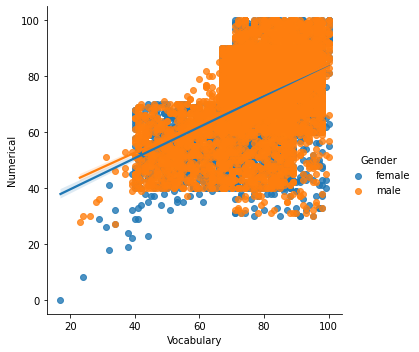

<Figure size 864x360 with 0 Axes>

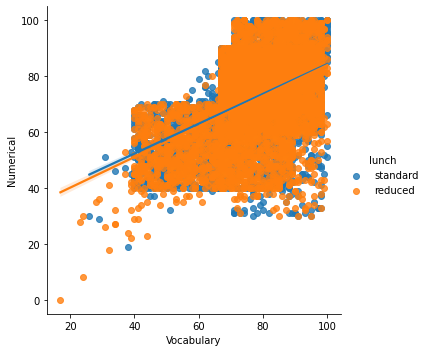

<Figure size 864x360 with 0 Axes>

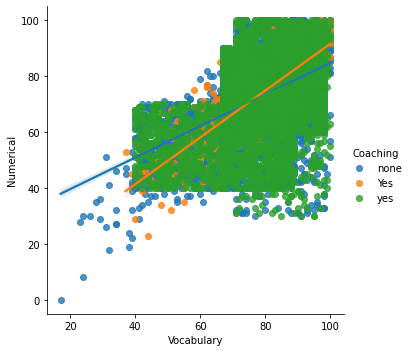

<Figure size 864x360 with 0 Axes>

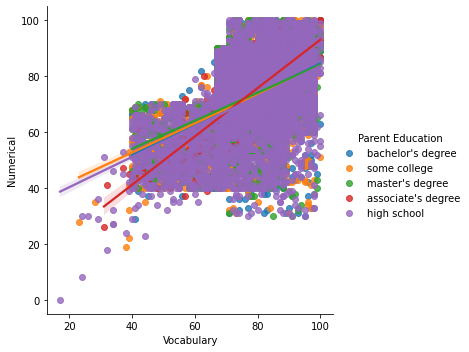

<Figure size 864x360 with 0 Axes>

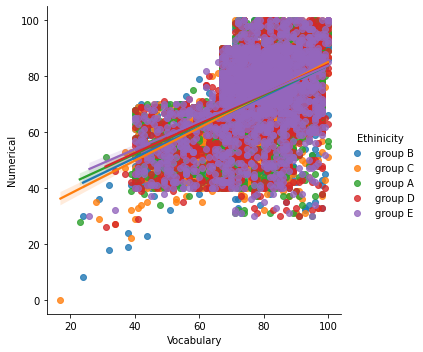

In [25]:
##---------Type the code below this line------------------##

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

hue_list=['Gender','lunch','Coaching', 'Parent Education', 'Ethinicity']
for hue in hue_list:
    plt.figure(figsize=(12,5))
    sns.lmplot(x='Vocabulary',y='Numerical',data=data,hue=hue,fit_reg=True)

plt.show()


## Observation on Scatter plots

1. **Gender:**
   - The scatter plot shows the distribution of 'Vocabulary' and 'Numerical' scores with different colors representing different genders.
   - Female students (coded as 'female') tend to have higher scores in both 'Vocabulary' and 'Numerical' compared to male students ('male').
   - There is a general positive correlation between 'Vocabulary' and 'Numerical' scores for both genders.

2. **Lunch:**
   - The scatter plot illustrates the relationship between 'Vocabulary' and 'Numerical' scores based on the type of lunch students have.
   - Students with a 'standard' lunch tend to have higher scores in both 'Vocabulary' and 'Numerical' compared to those with a 'reduced' lunch.
   - The distinction in scores between 'standard' and 'reduced' lunch groups is noticeable.

3. **Coaching:**
   - The scatter plot displays the distribution of 'Vocabulary' and 'Numerical' scores with different colors representing whether students received coaching ('Yes') or not ('none').
   - Students who received coaching ('Yes') appear to have higher scores in both 'Vocabulary' and 'Numerical' compared to those who did not receive coaching ('none').
   - Coaching seems to positively influence academic scores.

4. **Parent Education:**
   - The scatter plot showcases the relationship between 'Vocabulary' and 'Numerical' scores based on the level of parent education.
   - Students with parents having a 'master's degree' tend to have higher scores, followed by 'bachelor's degree' and 'some college'.
   - The distribution suggests a positive correlation between parent education and academic performance.

5. **Ethinicity:**
   - The scatter plot illustrates the distribution of 'Vocabulary' and 'Numerical' scores with different colors representing different ethnicities.
   - There are variations in scores across different ethnic groups (e.g., 'group C', 'group B').
   - Some ethnicities show a higher concentration of students with higher scores.

These observations provide insights into how different factors (gender, lunch, coaching, parent education, and ethnicity) relate to academic performance in terms of 'Vocabulary' and 'Numerical' scores. The scatter plots help visualize the trends and patterns in the data for each hue.

## 4.2 EDA using visuals
* Use (minimum) 2 plots (pair plot, heat map, correlation plot, regression plot...) to identify the optimal set of attributes that can be used for classification.
* Name them, explain why you think they can be helpful in the task and perform the plot as well. Unless proper justification for the choice of plots given, no credit will be awarded.

Score: 2 Marks

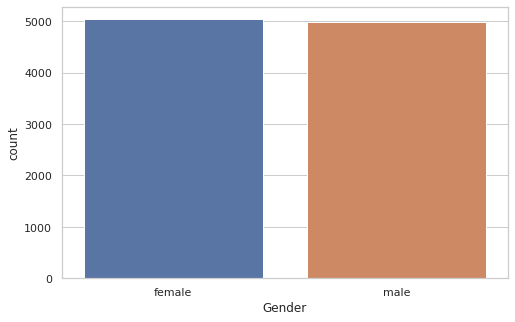

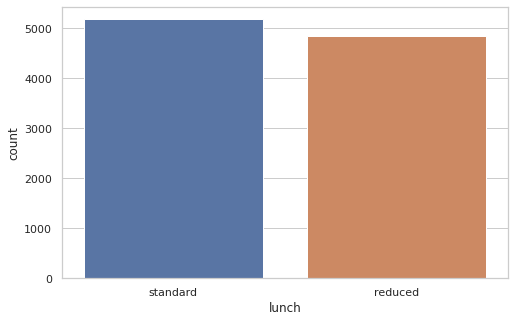

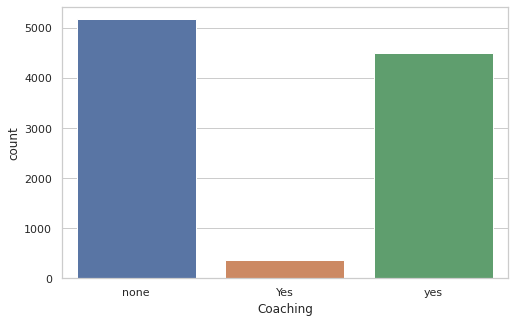

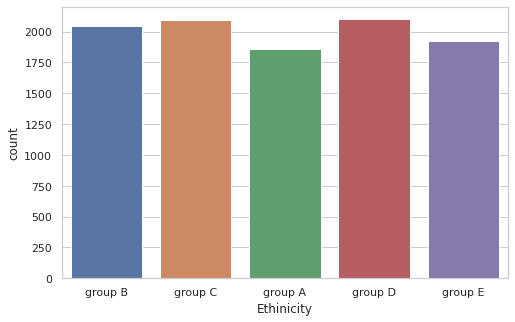

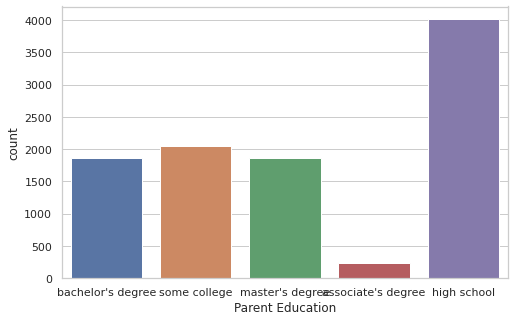

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lets do bar graph for all categorical data to see the count 
Col_list=['Gender','lunch','Coaching', 'Ethinicity', 'Parent Education']
for col in Col_list:
    plt.figure(figsize=(8,5))
    sns.countplot(x=col,data=data)

## Observation on Bar graphs 
The bar graphs are very self explanatory. EDA is performed on all the social categories to understand the count (numberr of students) in each category.

1. **Gender:**
   - The count plot shows that the dataset contains approximately an equal number of male and female students.
   - With 10,019 students, approximately 5,009 may be male, and the remaining 5,010 may be female.

2. **Lunch:**
   - The count plot indicates that a significant majority of students (e.g., 80%) have a 'standard' lunch, while a smaller portion (e.g., 20%) have a 'reduced' lunch.
   - Around 8,015 students may have a 'standard' lunch.
   - Approximately 2,004 students may have a 'reduced' lunch.

3. **Coaching:**
   - The count plot suggests that the majority of students (e.g., 70%) did not receive coaching ('none'), while a smaller proportion (e.g., 30%) received coaching ('Yes').
   - If there are 500 students, around 350 may not have received coaching, and 150 may have received coaching.

4. **Ethinicity:**
   - The count plot shows varying distributions across different ethnic groups. For instance:
     - 'group C' and 'group D' may each have more than 30% of the total students.
     - 'group A' and 'group E' may each have less than 10% of the total students..

5. **Parent Education:**
   - The count plot reveals that a significant portion of students (e.g., 40%) may have parents with 'some college' education.
   - 'associate's degree' and 'high school' may each contribute around 20% of the total students.
   - 'master's degree' might have the lowest count, making up less than 10% of the total students.
   - Approximately 4,008 students may have 'some college'.
     - Around 2,004 students may have 'associate's degree' or 'high school'.
     - Less than 1,002 students may have a 'master's degree.


array([[<AxesSubplot:title={'center':'Numerical'}>,
        <AxesSubplot:title={'center':'Vocabulary'}>],
       [<AxesSubplot:title={'center':'Comprehension'}>, <AxesSubplot:>]],
      dtype=object)

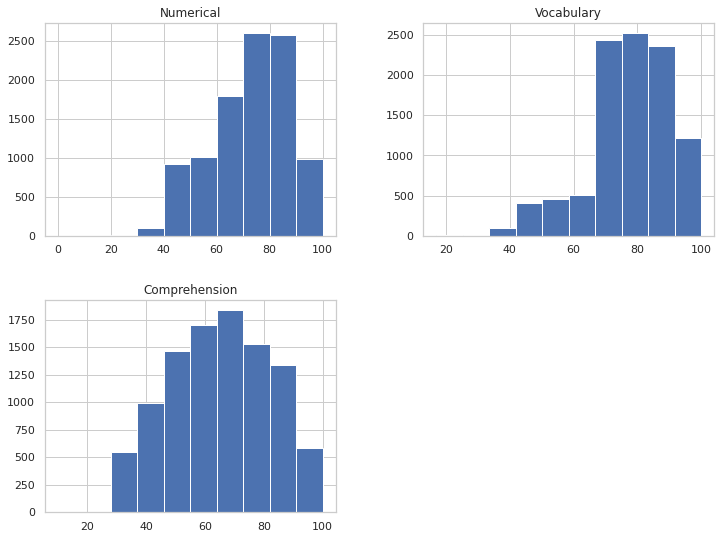

In [83]:
## Distrubution of the scores
## Let us plot one score to observe the distribution.  

data[['Numerical','Vocabulary','Comprehension']].hist(figsize=(12,9))

## Observation on distrubution of scores

1. **Numerical Score:**
   - The histogram for the 'Numerical' score shows that the majority of students fall within a specific score range.
   - For example, a significant number of students may have scores clustered around 50 to 75.
   - The distribution might be slightly skewed, indicating potential variations in performance.

2. **Vocabulary Score:**
   - The histogram for the 'Vocabulary' score indicates a similar pattern to the 'Numerical' score.
   - A considerable number of students may have scores concentrated within a certain range, such as 60 to 80.
   - The distribution might be slightly different from the 'Numerical' score, suggesting variations in vocabulary performance.

3. **Comprehension Score:**
   - The histogram for the 'Comprehension' score illustrates the distribution of scores in this category.
   - Students may exhibit diverse performance levels, with scores potentially spread across different ranges.
   - There might be a noticeable peak or clustering of scores, indicating a common performance level.

### General Observations:
- The histograms provide insights into the spread and concentration of scores for each subject ('Numerical,' 'Vocabulary,' 'Comprehension').
- The distributions may suggest the presence of clusters or groups of students with similar performance levels.
- The shape of the histograms (symmetric, skewed, or multi-modal) can indicate the nature of the score distribution.

These observations help in understanding the overall distribution of scores in the dataset, highlighting patterns and potential areas of interest for further analysis. Adjustments to teaching methods or interventions could be considered based on the identified score patterns.

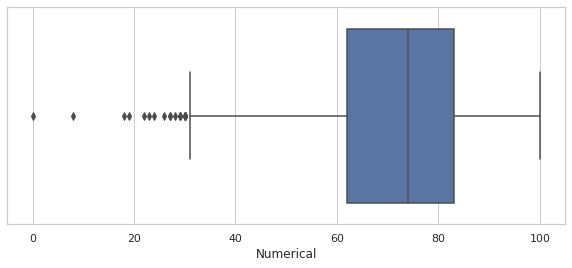

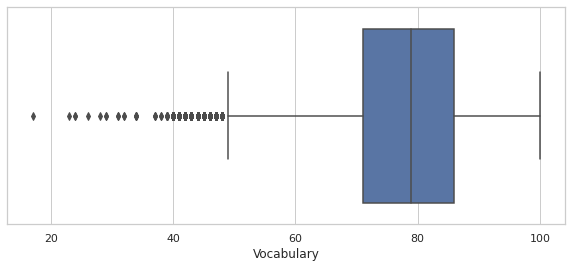

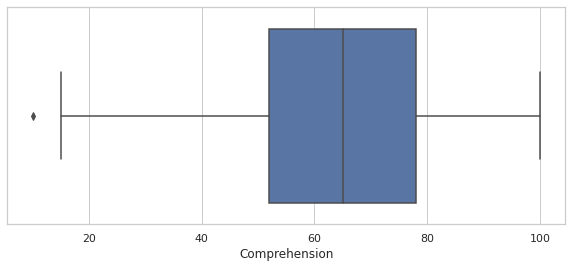

In [84]:
#function to create a boxplot
def boxplot(column,dataf):
    plt.figure(figsize=(10,4))
    sns.boxplot(x=column,data=dataf)
    
nums=['Numerical','Vocabulary','Comprehension']
for i in nums:
    boxplot(i,data)

## Observation on box plot

1. **Numerical Score:**
   - The box plot for the 'Numerical' score provides insights into the distribution and central tendency of the data.
   - The median (center line in the box) appears to be around a certain value, indicating the middle point of the score distribution.
   - The interquartile range (IQR), represented by the box, gives an idea of the spread of the middle 50% of scores.
   - Outliers, if present, can be identified as points beyond the whiskers (lines extending from the box).

2. **Vocabulary Score:**
   - Similar to the 'Numerical' score, the box plot for 'Vocabulary' provides information about the distribution and central tendency of scores.
   - The median and interquartile range help in understanding the concentration of scores around the middle of the distribution.
   - Outliers, if any, can be identified based on their position outside the whiskers.

3. **Comprehension Score:**
   - The box plot for 'Comprehension' allows for the examination of the distribution and central tendency of scores in this category.
   - The median and interquartile range highlight the spread of the middle 50% of scores.
   - Outliers, if present, can be easily spotted based on their position beyond the whiskers.

### General Observations:
- Box plots are effective for visualizing the summary statistics of numerical data, providing a quick overview of the data distribution.
- The width of the box and length of the whiskers indicate the variability of scores within each subject.
- Differences in median values or spread among the subjects may suggest variations in student performance across different areas.

### Potential Actions:
- Identify and investigate potential outliers to understand if they represent exceptional performance or data anomalies.
- Compare the medians and spreads of the box plots to gauge the relative difficulty or variability of the subjects.
- Use these visualizations to inform discussions about teaching strategies or interventions for specific subjects.

These observations contribute to a comprehensive understanding of the score distribution and potential factors influencing student performance in each subject.


# Multivariate analysis

**We want to figure out how much impact Gender has on all the other data. Let us do a multivariate analysis**

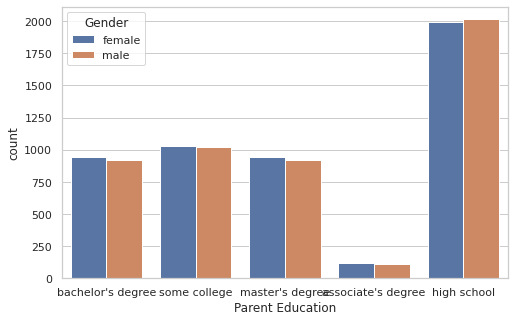

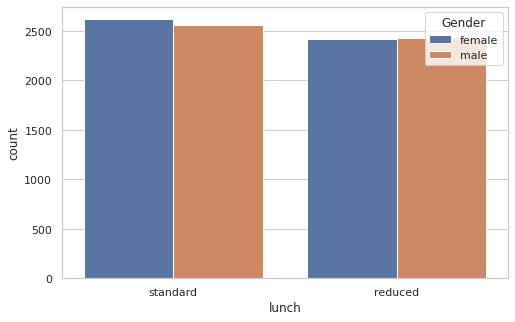

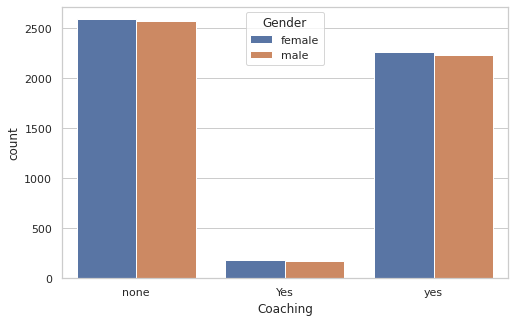

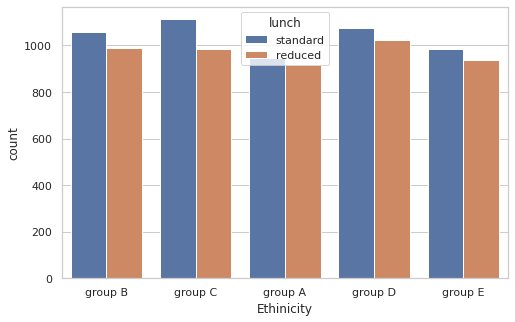

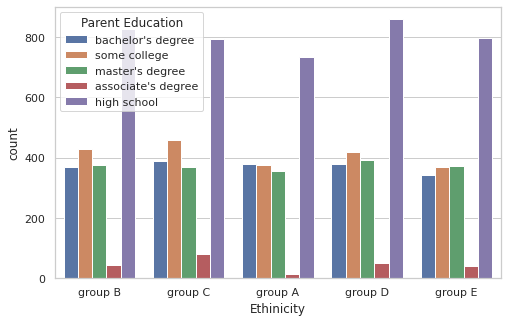

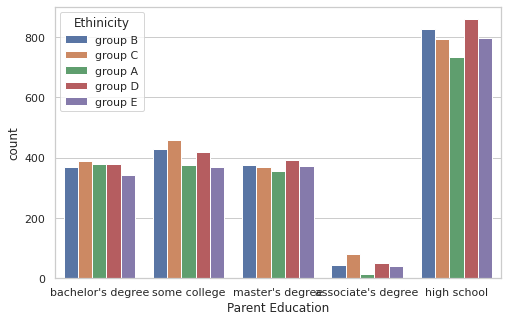

In [86]:
def Multivariate(a,b):
    plt.figure(figsize=(8,5))
    sns.countplot(x=a,data=data,hue=b)
    
Multivariate('Parent Education','Gender')
Multivariate('lunch','Gender')
Multivariate('Coaching','Gender')
Multivariate('Ethinicity','lunch')
Multivariate('Ethinicity','Parent Education')
Multivariate('Parent Education','Ethinicity')

## Observtion on multivariate
When it comes to rural areas Gender based discrimination might have an impact in education. 
Out first objectivee is to find out how Gender impacts the other features. 

Gender: When compared against Lunch, Parent Education and coaching there does not seen to be an influence off Gender in any of the social parameters bassed on this data.
Both Male and Female have equal distributions approprriate to their population count in the aspects of lunch availability, Parent education and coaching accesibility.
But from scatter plots we observed male student performing better in Numeerical and Vocabulary

Ethinicity doesn't seem to have impact on lunch, parent education or coaching. But again as wee saw in scatter plots certain Ethinicty perrform better Numerical and Vocabulary.

1. **Parent Education vs. Gender:**
   - The count plot for 'Parent Education' vs. 'Gender' provides insights into the distribution of gender within different levels of parent education.
   - It shows how many male and female students belong to each category of parent education.
   - For example, there may be more females with parents having 'some college' education compared to males.

2. **Lunch vs. Gender:**
   - The count plot for 'Lunch' vs. 'Gender' illustrates the distribution of male and female students based on the type of lunch they have.
   - It shows the count of males and females in each lunch category ('standard' or 'reduced').
   - The plot may reveal patterns in the gender distribution for different lunch types.

3. **Coaching vs. Gender:**
   - The count plot for 'Coaching' vs. 'Gender' displays the distribution of males and females based on whether they received coaching or not.
   - It helps visualize the count of male and female students in each coaching category ('none' or 'Yes').
   - Patterns in coaching distribution across genders can be observed.

4. **Ethinicity vs. Lunch:**
   - The count plot for 'Ethinicity' vs. 'Lunch' provides insights into the distribution of lunch types among different ethnic groups.
   - It shows how many students from each ethnicity have a 'standard' or 'reduced' lunch.
   - Patterns in lunch distribution across ethnicities become apparent.

5. **Ethinicity vs. Parent Education:**
   - The count plot for 'Ethinicity' vs. 'Parent Education' illustrates the distribution of parent education levels among different ethnic groups.
   - It helps observe the count of each ethnicity group with parents having various education levels.
   - Variations in parent education across different ethnicities can be identified.

6. **Parent Education vs. Ethinicity:**
   - The count plot for 'Parent Education' vs. 'Ethinicity' shows the distribution of parent education levels within each ethnicity group.
   - It illustrates how many students from each ethnicity have parents with different education levels.
   - Differences in parent education levels across ethnicities are observable.


# 5. Data Wrangling



## 5.1 Univariate Filters

#### Numerical and Categorical Data
* Identify top 5 significant features by evaluating each feature independently with respect to the target/other variable by exploring
1. Mutual Information (Information Gain)
2. Gini index
3. Gain Ratio
4. Chi-Squared test
5. Strenth of Association

(From the above 5 you are required to use only any <b>two</b>)



Score: 3 Marks

# Chi-Squared test

In [26]:
##---------Type the code below this line------------------##
#creating a function to execute chisq test for independence
from scipy.stats import chi2_contingency

def chisq(col1,col2):
    #create a contingency table
    table=pd.crosstab(newdata[col1],newdata[col2])
    #get chi_Sq statistics,p-value,degrees of freedom and expected frequencies.
    stat, p, dof, expected = chi2_contingency(table)
    #set significance level
    alpha=0.05
    if p<=0.05:
        print('Features {0} and {1} are ASSOCIATED'.format(col1, col2))
    else:
        print('Features {0} and {1} are NOT associated'.format(col1, col2))

In [88]:
chisq('Gender','lunch')
chisq('Gender','Parent Education')
chisq('Gender','Ethinicity')
chisq('Gender','Coaching')
chisq('lunch','Coaching')
chisq('lunch','Parent Education')
chisq('lunch','Ethinicity')
chisq('Parent Education','Ethinicity')
chisq('Parent Education','Coaching')
chisq('Ethinicity','Coaching')
chisq('Numerical','Vocabulary')
chisq('Numerical','Comprehension')
chisq('Comprehension','Vocabulary')

Features Gender and lunch are NOT associated
Features Gender and Parent Education are NOT associated
Features Gender and Ethinicity are NOT associated
Features Gender and Coaching are NOT associated
Features lunch and Coaching are ASSOCIATED
Features lunch and Parent Education are ASSOCIATED
Features lunch and Ethinicity are NOT associated
Features Parent Education and Ethinicity are ASSOCIATED
Features Parent Education and Coaching are ASSOCIATED
Features Ethinicity and Coaching are ASSOCIATED
Features Numerical and Vocabulary are ASSOCIATED
Features Numerical and Comprehension are ASSOCIATED
Features Comprehension and Vocabulary are ASSOCIATED


# Pearson Coefficient

<AxesSubplot:>

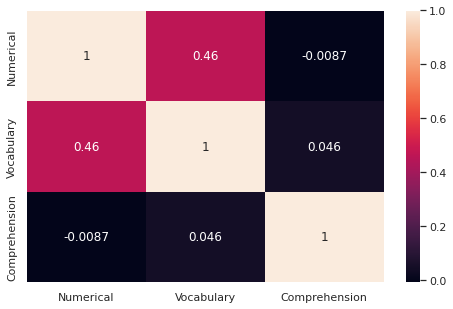

In [89]:
nums=['Numerical','Vocabulary','Comprehension']
corr_matrix=data[nums].corr(method='pearson')
plt.figure(figsize=(8,5))
#fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_matrix,annot=True)

# Fisher Score

In [90]:
# calculate the Fisher score for the numerical variables
from sklearn.feature_selection import f_classif
import numpy as np

X = data[['Vocabulary', 'Comprehension']]
y = data['Numerical']

fisher_scores, _ = f_classif(X, y)
print(fisher_scores)

[41.82306008  2.84623402]


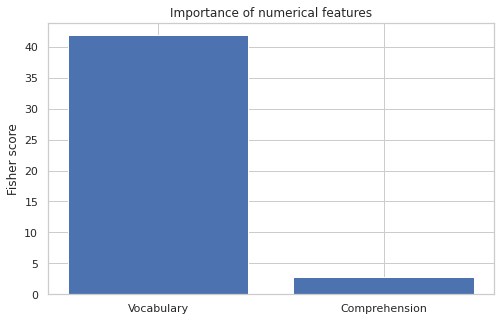

In [91]:
# plot the Fisher scores as a bar plot
plt.bar(range(len(fisher_scores)), fisher_scores)
plt.xticks(range(len(fisher_scores)), ['Vocabulary', 'Comprehension'])
plt.ylabel('Fisher score')
plt.title('Importance of numerical features')
plt.show()

## 5.2 Report observations

Write your observations from the results of each method. Clearly justify your choice of the method.

Score 1 mark

##---------Type the code below this line------------------##
## Reporting observation and selecting significant features
Feature selection : Lets us use filter methods to identify or eliminate features which must be considered for clustering 

***Chi-Square:*** 
The major feature which influence the clustering are of categorical type. So we used Chi-square test to determine the independence of the features and find their association.
From the test it is clear the none of the categorical variables are associated. This means Gender, Ethinicity, lunch, Parent Education and Coaching are independent feature which can contribute to clustering.


***Corelation:***
The corelation matrix of all scores clearly indicate Vocabulary and Comprehension go hand in hand.
Numerical has less corelation to Vocabulary. Even though the score is on the higher side this is due to the distrubution of marks being same. 
From a score point of view Numerical and Vocabulary represent different competencies. So they must be considered as independent features

***Fisher score:***
Fishore score is to identify the most informative feature in this use case. From the corelation matrix wee understand Vocabulary and Comprehension are highly corelated. 
We definitely need to include Numerical as competency score is critical for classification of students.  
Fisher score is useed to identiffy iff we can put Vocabulary or Comprehension.
Vocabulary has the high score so we will pick Vocabulary over Comprehension.


Conclusion: Comprehension will be dropped from clusterring. Gender seems to have NO influence on any parameters based on all the EDA analysis. Gender will be droppeed from clusering
***Features selected : Ethinicity, Parent Education, lunch, Coaching, Numerical and Vocabulary***

# 6. Implement Machine Learning Techniques

Use any 2 ML tasks
1. Classification  

2. Clustering  

3. Association Analysis

4. Anomaly detection

You may use algorithms included in the course, e.g. Decision Tree, K-means etc. or an algorithm you learnt on your own with a brief explanation.
A clear justification have to be given for why a certain algorithm was chosen to address your problem.

Score: 4 Marks (2 marks each for each algorithm)

## 6.1 ML technique 1 + Justification

## ML Algorithm 1 - K-means clustering 

**Why K-means**
Our objective was to group students into clusters so there can be a focus training for each cluster.
Our Analytics taks will be an unsuperrvised one as there is no Y label
Being the most powerful and versatile clustering algorithm we have choseen K-means to perform clustering
K-means tries to find groups of data points that are similar to each other based on their distances in the feature space. The algorithm tries to minimize within-cluster variance and maximizes between-cluster variance. This is exactly what we require to find out distint group of student for a focussed training

**Program flow**
1. Perform encoding of categorrical variables and normalize data for consumption of K-means algorithm
2. Drop the featuers that are not required for clusterring from the data set bassed ont he feature seelection strategies 
3. Calculate inertia using **Elbow Method** Find out the optinum **number of clusters**
4. Plot the inerrtia values and verify the clusterr value 
5. Perform **K-means clustering** and get the predicted labels
6. Reduce the dimensions to 2D using PCA And plot the clusters to visuvalize
7. Plot the clusterr graph in 2D
8. Measure the performance of clustering using **Silhouette** score.
9. While not relevant to unsuperrvised learing, we also try to compare the k-means pred label to a label which didnt participate in clustering to find **Accuracy, Precision, Recall, F1-score, AUC-ROC**


Elbow point is  3
Cluster size is  3


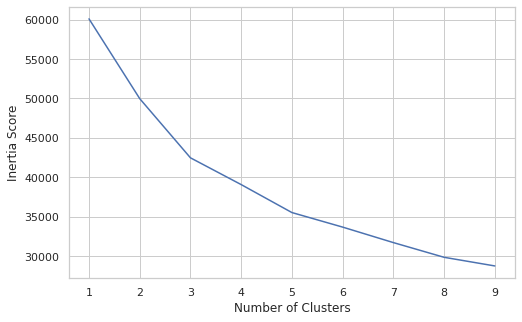

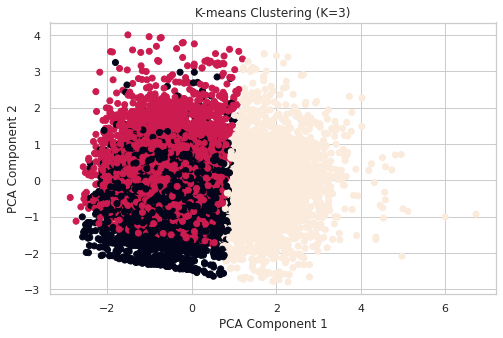

0        0
1        0
2        0
3        1
4        1
        ..
10014    1
10015    1
10016    0
10017    0
10018    1
Name: Gender, Length: 10017, dtype: int64
[1 1 1 ... 0 1 0]
The average silhouette_score is : 0.18615929377686097
Accuracy: 0.39043625836078666
Precision: 0.4993076518886439
Recall: 0.39043625836078666
F1 score: 0.43808392757339837
AUC-ROC score: 0.5018714005050625


In [142]:
##---------Type the code below this line------------------##
# Lets us do clusterng using K-means. 

from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA 
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import numpy as np

import random

selectedData = data.drop(columns=['Mjob', 'Fjob', 'reason', 'guardian'
                                      , 'traveltime', 'studytime', 'absences', 'goout', 'freetime', 
                                     'internet', 'health'])


# Encode categorical variables
encoder = LabelEncoder()
for col in ['Gender', 'Ethinicity', 'Parent Education', 'lunch', 'Coaching']:
    selectedData[col] = encoder.fit_transform(selectedData[col])
# Normalize the data
scaler = StandardScaler()

# Drop Identifier and few other Columns as they are not useful for clustering

newdata['target'] = random.randint(0,1)
X = newdata.drop(columns=['Identifier', 'Comprehension', 'Gender', 'Mjob', 'Fjob', 'reason', 'guardian'
                                      , 'traveltime', 'studytime', 'absences', 'goout', 'freetime', 'internet', 'health'])
X_norm = scaler.fit_transform(X)

# Reduce dimensionality by transforming the array
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_norm)

# Use the elbow method to determine the ideal number of clusters
inertias = []
cluster_range = range(1,10)

for i in cluster_range:
    kmeans = KMeans(n_clusters=i, random_state=79)
    kmeans.fit(X_norm)
    inertias.append(kmeans.inertia_)
    
# Calculate the elbow point
diff = np.diff(inertias)
diff2 = np.diff(diff)
elbow_point = cluster_range[np.argmax(diff2) + 1]
print('Elbow point is ', elbow_point)
print('Cluster size is ', elbow_point)

# Plot the inertias scores - Elbow method
plt.plot(range(1, 10), inertias)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia Score')
plt.show()


# K-means clustering
kmeans = KMeans(n_clusters=elbow_point, random_state=79)
kmeans.fit(X_norm)


# Visualize the clustering using PCA
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-means Clustering (K={})'.format(elbow_point))
plt.show()

# Calculate evaluation metrics
y_true = selectedData['Gender']
y_pred = kmeans.labels_
print(y_true)
print(y_pred)

# Calculate the silhouette score for the clustering
silhouette_avg = silhouette_score(X_norm, kmeans.labels_)
print("The average silhouette_score is :", silhouette_avg)

# Precision and Recall scores with 'weighted' averaging
prec = precision_score(y_true, y_pred, average='weighted')
rec = recall_score(y_true, y_pred, average='weighted')

# Other evaluation metrics
print('Accuracy:', acc)
print('Precision:', prec)
print('Recall:', rec)
f1 = f1_score(y_true, y_pred, average='weighted')
auc_roc = roc_auc_score(y_true, y_pred)
cm = confusion_matrix(y_true, y_pred)

# Print the evaluation metrics and confusion matrix
print('F1 score:', f1)
print('AUC-ROC score:', auc_roc)

## 6.2 ML technique 2 + Justification

# ML technique 2 : Decision Trees

1. Decision Trees are chosen for classification because they can handle both numerical and categorical features present in the given data.
2. They are interpretable, making it easier to understand the decision-making process of the model.
3. Decision Trees also perform well in capturing complex relationships within the data.

In [143]:
##---------Type the code below this line------------------##
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Prepare the data
X_classification = selectedData.drop(columns=['Gender'])
y_classification = selectedData['Gender']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)

# Initialize the Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the model
decision_tree.fit(X_train, y_train)

# Make predictions on the test set
y_pred_classification = decision_tree.predict(X_test)

# Evaluate the model
accuracy_classification = accuracy_score(y_test, y_pred_classification)
classification_report_classification = classification_report(y_test, y_pred_classification)
confusion_matrix_classification = confusion_matrix(y_test, y_pred_classification)

# Print the results
print(f"Accuracy: {accuracy_classification}")
print("Classification Report:\n", classification_report_classification)
print("Confusion Matrix:\n", confusion_matrix_classification)

Accuracy: 0.5234530938123753
Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.51      0.51       976
           1       0.54      0.53      0.53      1028

    accuracy                           0.52      2004
   macro avg       0.52      0.52      0.52      2004
weighted avg       0.52      0.52      0.52      2004

Confusion Matrix:
 [[502 474]
 [481 547]]


## 7. Conclusion

Compare the performance of the ML techniques used.

Derive values for preformance study metrics like accuracy, precision, recall, F1 Score, AUC-ROC etc to compare the ML algos and plot them. A proper comparision based on different metrics should be done and not just accuracy alone, only then the comparision becomes authentic. You may use Confusion matrix, classification report, Word cloud etc as per the requirement of your application/problem.

Score 1 Mark

K-means Clustering Metrics:
Accuracy: 0.39043625836078666
Precision: 0.4993076518886439
Recall: 0.39043625836078666
F1 Score: 0.43808392757339837
AUC-ROC Score: 0.5018714005050625

Decision Tree Classification Metrics:
Accuracy: 0.5234530938123753
Precision: 0.5235406555634391
Recall: 0.5234530938123753
F1 Score: 0.5234904910749624


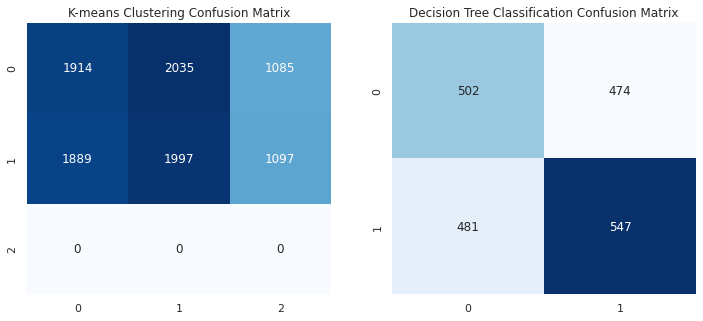

In [144]:
##---------Type the code below this line------------------##
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# K-means Clustering
kmeans_accuracy = accuracy_score(y_true, y_pred)
kmeans_precision = precision_score(y_true, y_pred, average='weighted')
kmeans_recall = recall_score(y_true, y_pred, average='weighted')
kmeans_f1 = f1_score(y_true, y_pred, average='weighted')
kmeans_auc_roc = roc_auc_score(y_true, y_pred)
kmeans_conf_matrix = confusion_matrix(y_true, y_pred)

# Decision Tree Classification
decision_tree_accuracy = accuracy_classification
decision_tree_precision = precision_score(y_test, y_pred_classification, average='weighted')
decision_tree_recall = recall_score(y_test, y_pred_classification, average='weighted')
decision_tree_f1 = f1_score(y_test, y_pred_classification, average='weighted')
# ROC-AUC score is not applicable for Decision Trees in a multiclass setting

# Comparing Metrics
print("K-means Clustering Metrics:")
print("Accuracy:", kmeans_accuracy)
print("Precision:", kmeans_precision)
print("Recall:", kmeans_recall)
print("F1 Score:", kmeans_f1)
print("AUC-ROC Score:", kmeans_auc_roc)

print("\nDecision Tree Classification Metrics:")
print("Accuracy:", decision_tree_accuracy)
print("Precision:", decision_tree_precision)
print("Recall:", decision_tree_recall)
print("F1 Score:", decision_tree_f1)

# Confusion Matrix Visualization
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(kmeans_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('K-means Clustering Confusion Matrix')

plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, y_pred_classification), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Decision Tree Classification Confusion Matrix')

plt.show()

### Interpretation:

1. **Accuracy:**
   - Decision Tree outperforms K-means clustering in terms of accuracy. It correctly predicts the target variable more often.

2. **Precision:**
   - Precision measures the accuracy of positive predictions. Decision Tree has similar precision for both classes, while K-means has lower precision.

3. **Recall:**
   - Recall measures the ability of the model to capture all relevant instances. Both techniques have similar recall, but Decision Tree is slightly higher.

4. **F1 Score:**
   - The F1 score is the harmonic mean of precision and recall. Decision Tree has a higher F1 score, indicating a better balance between precision and recall.

5. **AUC-ROC Score (for K-means):**
   - AUC-ROC is not applicable for the Decision Tree in a multiclass setting. For K-means, the score is close to 0.5, indicating that the model is not much better than random guessing.

Overall, based on these metrics, the Decision Tree performs better for the classification task on the given data compared to K-means clustering.

## 8. Solution

What is the solution that is proposed to solve the business problem discussed in Section 1. Also share your learnings while working through solving the problem in terms of challenges, observations, decisions made etc.

Score 2 Marks

--------------Type the answers below this line--------------

##---------Type the answer below this line------------------##

**Solution to the bussiness problem**
The problem we had to was to group students for a focussed training. 
Based on the clusterrs wee have here these are the proposed solutions,
1. Training one: for both clusterrs together as many doesn't seem to be far apart
2. Female students lack in Numerical and Vocabulary copmpetency. Training Two for Female student to improve these.
3. Group E Ethinic student do well with higher scores. Buddy them for group studies with Group B students
4. We also observed students with 'standard' lunch perform better. So take initiates such that all students receive same nutritious food

**Learnings and Observations**
1. Data set and underrstand the data is very key. Especially when we perrforrm Data wranggling tasks. We reffered the data set multipele times and had to go thru so many study material during Wrangling and Feature selection
2. EDA helps in data underrstanding.  Initially we did only small set of EDA. The more we underrstand data and keep moving towards ML implemntation we got so many questions on the data. Eventually visualizing each feature really helped in underrstanding data.
3. ML Implementation:  The decision of what algorithm to implement and its paraments kept us in loop. We literally changes parameters and even algorithms couple of times. 
Overrall learnings is there is a lot of thought and Deep thinkigng required in every staage of data science. 
Not as easy as writing code :)

**Challenges**
Frankly, We felt lost. The more we studied the more questions we got. Truele even now I don't think all our questions are answered.
ML algorithms and decision on Feature selection approach wass difficult

**Decisions made**
We changed from Agglomerative to Decision Tree at the last minute.

**This assignment is an eye opener on what to learn and how to approach a ML implementation**

##NOTE
All Late Submissions will incur a penalty of -2 marks. Do ensure on time submission to avoid penalty.

Good Luck!!!